In [44]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
airbagmodel = tf.keras.models.load_model(r'C:\Users\imadc\Super Folder\modelss\MobileNetAirBagModel.h5')

# Predicting on a unseen image

In [37]:
image_path = r'C:\Users\imadc\Super Folder\testingimages\037.png'
img = image.load_img(image_path, target_size=(110, 110))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0

predictions = airbagmodel.predict(img, verbose=0)

probability = predictions[0][0]

threshold = 0.8

if probability > threshold:
    classification = "Airbags Opened"
else:
    classification = "Normal View"

# Print the result
print(f"Class: {classification}")
print(f"Probability of {classification} is: {probability * 100:.2f}")
print("Closer the probabilty to 0 stonger the prediction for Normal View\nCloser the Probabilty to 100 stronger the prediction for Airbags Opened")


Prediction Probabilities: [[1.0000000e+00 1.9718629e-21]]
Predicted Class = Normal
Normal = 100.00% || Open Air Bags = 0.00%


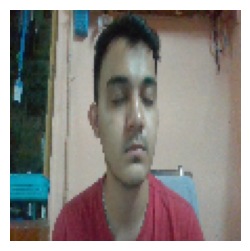

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3)) 
plt.imshow(img[0])
plt.axis('off')
plt.show()

# Notification setup

In [48]:
from pushbullet import PushBullet
from pywebio.input import *
from pywebio.output import *
from pywebio.session import *
import time

In [49]:
import requests
import json

def pushbullet_noti(title, body):

	TOKEN = 'o.RbpaZEZbP7RQtS8DRita8WKM2nSWtT84' 
	msg = {"type": "note", "title": title, "body": body}	
	resp = requests.post('https://api.pushbullet.com/v2/pushes',
						data=json.dumps(msg),
						headers={'Authorization': 'Bearer ' + TOKEN,
								'Content-Type': 'application/json'})
	if resp.status_code != 200: 
		raise Exception('Error', resp.status_code)
	else:
		print('Sending Message to Friends and Relatives')

# Predicting on a live video

In [42]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

font = cv2.FONT_HERSHEY_COMPLEX_SMALL

alert_threshold=30
consecutive_frames = 0
alert_triggered = False

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    if not ret:
        break

    img = cv2.resize(frame, (110, 110))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    predictions = airbagmodel.predict(img, verbose=0)
    print(f'Regular view: {predictions[0][0]*100:.1f}% | Open AirBags: {predictions[0][1]*100:.1f}%')

    if predictions[0][1] >= 0.7:
        consecutive_frames += 1
    else:
        consecutive_frames = 0

    if consecutive_frames >= alert_threshold and not alert_triggered:
        print("Air bags are open! Triggering alert.")
        pushbullet_noti("Alert", "A I had an accident just now")
        alert_triggered = True

    if alert_triggered:            
        print('Air bags are open! Triggering Alert! Message sent to your Loved ones')
      
    cv2.imshow("Live Feed", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Regular view: 35.1% | Open AirBags: 46.0%
Regular view: 95.1% | Open AirBags: 100.0%
Regular view: 95.7% | Open AirBags: 100.0%
Regular view: 0.7% | Open AirBags: 100.0%
Regular view: 3.2% | Open AirBags: 100.0%
Regular view: 99.6% | Open AirBags: 99.6%
Regular view: 100.0% | Open AirBags: 0.7%
Regular view: 100.0% | Open AirBags: 0.0%
Regular view: 100.0% | Open AirBags: 1.2%
Regular view: 100.0% | Open AirBags: 0.0%
Regular view: 0.9% | Open AirBags: 100.0%
Regular view: 100.0% | Open AirBags: 0.0%
Regular view: 100.0% | Open AirBags: 0.0%
Regular view: 100.0% | Open AirBags: 0.0%
Regular view: 100.0% | Open AirBags: 0.0%
Regular view: 100.0% | Open AirBags: 0.0%
Regular view: 100.0% | Open AirBags: 0.0%
Regular view: 100.0% | Open AirBags: 0.0%
Regular view: 100.0% | Open AirBags: 0.0%
Regular view: 100.0% | Open AirBags: 0.0%
Regular view: 100.0% | Open AirBags: 0.0%
Regular view: 100.0% | Open AirBags: 0.0%
Regular view: 100.0% | Open AirBags: 0.0%
Regular view: 100.0% | Open AirB

# Android 

In [50]:
import os
import requests
import cv2
import numpy as np
import imutils
from tensorflow.keras.preprocessing import image

import tensorflow as tf
airbagmodel = tf.keras.models.load_model(r'C:\Users\imadc\Super Folder\modelss\MobileNetAirBagModel.h5')


class AndroidCameraCapture:
    def __init__(self, url):
        self.url = url

    def read(self):
        img_resp = requests.get(self.url)
        img_arr = np.array(bytearray(img_resp.content), dtype=np.uint8)
        img = cv2.imdecode(img_arr, -1)
        img = imutils.resize(img, width=1000, height=1800)
        return True, img

    def release(self):
        pass

android_camera_url = "http://192.168.0.154:8080/shot.jpg"
android_camera = AndroidCameraCapture(android_camera_url)

font = cv2.FONT_HERSHEY_COMPLEX_SMALL
consecutive_frames = 0
alert_triggered = False
alert_threshold = 30

while True:
    ret, frame = android_camera.read()

    if not ret:
        break

    img = cv2.resize(frame, (110, 110))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    predictions = airbagmodel.predict(img, verbose=0)
    print(f'Regular view: {predictions[0][0]*100:.1f}% | Open AirBags: {predictions[0][1]*100:.1f}%')

    if predictions[0][1] >= 0.7:
        consecutive_frames += 1
    else:
        consecutive_frames = 0

    if consecutive_frames >= alert_threshold and not alert_triggered:
        pushbullet_noti("Alert", "A I had an accident just now")
        print("Air bags are open! Triggering alert.")
        alert_triggered = True
 

    cv2.imshow("Live Feed", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


android_camera.release()
cv2.destroyAllWindows()

Regular view: 17.5% | Open AirBags: 78.7%
Regular view: 98.4% | Open AirBags: 23.5%
Regular view: 97.8% | Open AirBags: 92.7%
Regular view: 100.0% | Open AirBags: 68.2%
Regular view: 11.9% | Open AirBags: 99.9%
Regular view: 90.0% | Open AirBags: 98.8%
Regular view: 86.3% | Open AirBags: 73.9%
Regular view: 100.0% | Open AirBags: 0.6%
Regular view: 95.9% | Open AirBags: 63.0%
Regular view: 100.0% | Open AirBags: 0.1%
Regular view: 100.0% | Open AirBags: 0.0%
Regular view: 99.8% | Open AirBags: 1.0%
Regular view: 99.2% | Open AirBags: 9.0%
Regular view: 99.2% | Open AirBags: 3.4%
Regular view: 99.9% | Open AirBags: 2.5%
Regular view: 99.9% | Open AirBags: 7.7%
Regular view: 100.0% | Open AirBags: 5.4%
Regular view: 100.0% | Open AirBags: 0.4%
Regular view: 99.9% | Open AirBags: 48.0%
Regular view: 100.0% | Open AirBags: 0.6%
Regular view: 100.0% | Open AirBags: 0.6%
Regular view: 100.0% | Open AirBags: 0.9%
Regular view: 100.0% | Open AirBags: 0.8%
Regular view: 99.8% | Open AirBags: 10